<a href="https://colab.research.google.com/github/vyankateshgithubber/Audio-Source-Count-Estimation/blob/working/CNNmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def stft(y,sr):
  S = np.abs(librosa.stft(y))
  return S

In [5]:
X = []
y = []
path = '/content/drive/MyDrive/MajorProject/AudioDataset/'

for k1 in np.arange(0.2,1.2,0.2):
  for k2 in np.arange(0.2,1.2,0.2):
    audiofilepath = path+'2_'+str(round(k1,3))+'_'+str(round(k2,3))+'.wav'
    signal, sr = librosa.load(path=audiofilepath)
    X.append(stft(signal,sr))
    y.append(1)


for k1 in np.arange(0.1,1.1,0.1):
  audiofilepath = path+'1_'+str(round(k1,3))+'_'+str(round(0,3))+'.wav'
  signal, sr = librosa.load(path=audiofilepath)
  X.append(stft(signal,sr))
  y.append(0)


for k1 in np.arange(0.1,1.1,0.1):
  audiofilepath = path +'1_'+str(round(0,3))+'_'+str(round(k1,3))+'.wav'
  signal, sr = librosa.load(path=audiofilepath)
  X.append(stft(signal,sr))
  y.append(0)


X = np.array(X)
y = np.array(y)
size = X.shape
X = X.reshape((size[0],size[1],size[2],1))
y = y.reshape((size[0],1))


In [43]:
X.shape,y.shape

((45, 1025, 229, 1), (45, 1))

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True)

In [45]:
print(X_train.shape,y_train.shape)

(36, 1025, 229, 1) (36, 1)


In [46]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import models


In [72]:
input_shape = X_train.shape[1:]
model = models.Sequential([
    layers.Input(shape=input_shape),
    preprocessing.Resizing(32, 32), 
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3),
])


In [73]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing_4 (Resizing)        (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

In [76]:
model.compile(optimizer="Adam", loss="mse", metrics=["accuracy"])
history = model.fit(X_train, y_train,validation_split=0.2, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 744ms/step - loss: 0.2845 - accuracy: 0.5000 - val_loss: 0.2397 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 126ms/step - loss: 0.2224 - accuracy: 0.5357 - val_loss: 0.2131 - val_accuracy: 0.6250
Epoch 3/10
1/1 [==============================] - 0s 125ms/step - loss: 0.3226 - accuracy: 0.4286 - val_loss: 0.2165 - val_accuracy: 0.8750
Epoch 4/10
1/1 [==============================] - 0s 124ms/step - loss: 0.2625 - accuracy: 0.4643 - val_loss: 0.2438 - val_accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 0s 125ms/step - loss: 0.1745 - accuracy: 0.4643 - val_loss: 0.2617 - val_accuracy: 0.8750
Epoch 6/10
1/1 [==============================] - 0s 122ms/step - loss: 0.2230 - accuracy: 0.3571 - val_loss: 0.2623 - val_accuracy: 0.8750
Epoch 7/10
1/1 [==============================] - 0s 126ms/step - loss: 0.2940 - accuracy: 0.3214 - val_loss: 0.2522 - val_accuracy: 0.8750
Epoch 8/10
1/1 [====

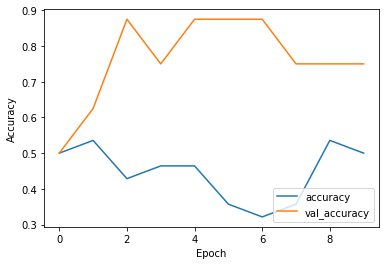

In [77]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [78]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("Test Loss ", test_loss)
print("Test Accuracy ", test_acc)

1/1 - 0s - loss: 0.1471 - accuracy: 0.8889
Test Loss  0.14707361161708832
Test Accuracy  0.8888888955116272


In [1]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import models

def model1():
  input_shape = X_train.shape[1:]
  model = models.Sequential([
      layers.Input(shape=input_shape),
      preprocessing.Resizing(32, 32), 
      #layers.Conv2D(32, 3, activation='relu'),
      layers.Conv2D(64, 3, activation='relu'),
      layers.MaxPooling2D(),
      layers.Dropout(0.25),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(3),
    ])
  model.compile(optimizer="Adam", loss="mse", metrics=["accuracy"])
  history = model.fit(X_train, y_train,validation_split=0.2, epochs=10)
  test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
  print("Test Loss ", test_loss)
  print("Test Accuracy ", test_acc)
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')


In [2]:
model1()

NameError: ignored